In [1]:
# compactiv Linear Regression
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# import statsmodels.formula.api as sm
import scipy, scipy.stats
import statsmodels.api as SM
import statsmodels.formula.api as SM
##from sklearn.metrics import mean_square_error
import statsmodels.api as st
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
# load the dataset 

data = pd.read_excel('compactiv.xlsx')

In [3]:
# First 5 rows of Data set 

data.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound     4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound     7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound      702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound     7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound      633   

  freeswap  usr  
0  1730946   95  
1  1869002   97  
2  1021237   87  
3  1863704   98  
4  1760253   90  

[5 rows x 22 columns]

In [4]:
# last  rows of Dataset

data.tail()

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  \
8187     16      12   3009    360     244   1.6  5.81  405250.0  85282.0   
8188      4       0   1596    170     146   2.4  1.80   89489.0  41764.0   
8189     16       5   3116    289     190   0.6  0.60  325948.0  52640.0   
8190     32      45   5180    254     179   1.2  1.20   62571.0  29505.0   
8191      2       0    985     55      46   1.6  4.80  111111.0  22256.0   

      pgout  ...  pgscan  atch   pgin  ppgin    pflt    vflt         runqsz  \
8187   8.02  ...   55.11   0.6  35.87  47.90  139.28  270.74      CPU_Bound   
8188   3.80  ...    0.20   0.8   3.80   4.40  122.40  212.60  Not_CPU_Bound   
8189   0.40  ...    0.00   0.4  28.40  45.20   60.20  219.80  Not_CPU_Bound   
8190   1.40  ...   18.04   0.4  23.05  24.25   93.19  202.81      CPU_Bound   
8191   0.00  ...    0.00   0.2   3.40   6.20   91.80  110.00      CPU_Bound   

      freemem freeswap  usr  
8187      387   986647   80  
8188      263  1055742   90  
8189      400   969106   87  
8190      141  1022458   83  
8191      659  1756514   94  

[5 rows x 22 columns]

#### 1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the Data types, shape, EDA, 5 point summary). Perform Univariate, Bivariate Analysis, Multivariate Analysis.

In [5]:
# Shape of the Dataset

data.shape

(8192, 22)

In [6]:
# Columns

data.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap', 'usr'],
      dtype='object')

In [7]:
# To search for missing values

data.isnull().sum() 

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

In [8]:
# Datatypes

type(data)

pandas.core.frame.DataFrame

In [9]:
from sklearn.impute import SimpleImputer


In [10]:
#Impute Nans in rchar & wchar column mby taking the median
imp = SimpleImputer(missing_values=np.nan, strategy='median')
data['rchar'] = imp.fit_transform(data['rchar'].values.reshape(-1,1))
data['wchar'] = imp.fit_transform(data['wchar'].values.reshape(-1,1))


In [11]:
# Info of Data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8192 non-null   float64
 8   wchar     8192 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [12]:
data.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap', 'usr'],
      dtype='object')

In [13]:
# Converting the float values to int64

float_cols =['fork', 'exec', 'rchar','wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin', 'pflt', 'vflt']
for col in float_cols:
    data[col] = data[col].astype('int64')


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   lread     8192 non-null   int64 
 1   lwrite    8192 non-null   int64 
 2   scall     8192 non-null   int64 
 3   sread     8192 non-null   int64 
 4   swrite    8192 non-null   int64 
 5   fork      8192 non-null   int64 
 6   exec      8192 non-null   int64 
 7   rchar     8192 non-null   int64 
 8   wchar     8192 non-null   int64 
 9   pgout     8192 non-null   int64 
 10  ppgout    8192 non-null   int64 
 11  pgfree    8192 non-null   int64 
 12  pgscan    8192 non-null   int64 
 13  atch      8192 non-null   int64 
 14  pgin      8192 non-null   int64 
 15  ppgin     8192 non-null   int64 
 16  pflt      8192 non-null   int64 
 17  vflt      8192 non-null   int64 
 18  runqsz    8192 non-null   object
 19  freemem   8192 non-null   int64 
 20  freeswap  8192 non-null   int64 
 21  usr       8192

In [15]:
# Categorizing object variables

for feature in data.columns: 
    if data[feature].dtype == 'object': 
        print(feature)
        print(data[feature].value_counts())
        print('\n')


runqsz
Not_CPU_Bound    4331
CPU_Bound        3861
Name: runqsz, dtype: int64




In [16]:
data['wchar'].isnull().sum().any()

False

In [17]:
nan_in_df = data.isnull().sum().any()
print('Number of NaN values present: ' + str(nan_in_df))


Number of NaN values present: False


In [18]:
# Replace ? to new unknown category
# adult_data.workclass=adult_data.workclass.str.replace('?', 'unknown')
# adult_data.occupation = adult_data.occupation.str.replace('?', 'unknown')


In [19]:
# Summary of Data

data.describe()

lread       lwrite         scall        sread       swrite  \
count  8192.000000  8192.000000   8192.000000  8192.000000  8192.000000   
mean     19.559692    13.106201   2306.318237   210.479980   150.058228   
std      53.353799    29.891726   1633.617322   198.980146   160.478980   
min       0.000000     0.000000    109.000000     6.000000     7.000000   
25%       2.000000     0.000000   1012.000000    86.000000    63.000000   
50%       7.000000     1.000000   2051.500000   166.000000   117.000000   
75%      20.000000    10.000000   3317.250000   279.000000   185.000000   
max    1845.000000   575.000000  12493.000000  5318.000000  5456.000000   

              fork         exec         rchar         wchar        pgout  ...  \
count  8192.000000  8192.000000  8.192000e+03  8.192000e+03  8192.000000  ...   
mean      1.501343     2.413330  1.964728e+05  9.581275e+04     2.110107  ...   
std       2.461422     5.189563  2.384460e+05  1.407285e+05     5.196360  ...   
min       0.000000     0.000000  2.780000e+02  1.498000e+03     0.000000  ...   
25%       0.000000     0.000000  3.486050e+04  2.297775e+04     0.000000  ...   
50%       0.000000     1.000000  1.254730e+05  4.661900e+04     0.000000  ...   
75%       2.000000     2.000000  2.653948e+05  1.060370e+05     2.000000  ...   
max      20.000000    59.000000  2.526649e+06  1.801623e+06    81.000000  ...   

            pgfree       pgscan         atch         pgin        ppgin  \
count  8192.000000  8192.000000  8192.000000  8192.000000  8192.000000   
mean     11.743164    21.436523     0.952759     7.919556    12.027832   
std      32.264658    71.039534     5.656840    13.827715    22.240606   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     2.000000     3.000000   
75%       5.000000     0.000000     0.000000     9.000000    13.000000   
max     523.000000  1237.000000   211.000000   141.000000   292.000000   

              pflt         vflt       freemem      freeswap          usr  
count  8192.000000  8192.000000   8192.000000  8.192000e+03  8192.000000  
mean    109.349731   184.864136   1763.456299  1.328126e+06    83.968872  
std     114.436916   191.016521   2482.104511  4.220194e+05    18.401905  
min       0.000000     0.000000     55.000000  2.000000e+00     0.000000  
25%      25.000000    45.000000    231.000000  1.042624e+06    81.000000  
50%      63.000000   120.000000    579.000000  1.289290e+06    89.000000  
75%     159.000000   251.000000   2002.250000  1.730380e+06    94.000000  
max     899.000000  1365.000000  12027.000000  2.243187e+06    99.000000  

[8 rows x 21 columns]

In [20]:
# The five-number summary involves the calculation of 5 summary statistical quantities: namely:

#Median: The middle value in the sample, also called the 50th percentile or the 2nd quartile.
#1st Quartile: The 25th percentile.
#3rd Quartile: The 75th percentile.
#Minimum: The smallest observation in the sample.
#Maximum: The largest observation in the sample.

#### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of creating new features if required. Also check for outliers and duplicates if there.


In [21]:
# To search for missing values

data.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

In [22]:
# To find duplicated values

dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(data.shape)


Number of duplicate rows = 0
(8192, 22)


In [23]:
# To find dummies and drop Frist column

data=pd.get_dummies(data,drop_first=True)
data.head()


lread  lwrite  scall  sread  swrite  fork  exec   rchar  wchar  pgout  ...  \
0      1       0   2147     79      68     0     0   40671  53995      0  ...   
1      0       0    170     18      21     0     0     448   8385      0  ...   
2     15       3   2162    159     119     2     2  125473  31950      0  ...   
3      0       0    160     12      16     0     0  125473   8670      0  ...   
4      5       1    330     39      38     0     0  125473  12185      0  ...   

   pgscan  atch  pgin  ppgin  pflt  vflt  freemem  freeswap  usr  \
0       0     0     1      2    16    26     4670   1730946   95   
1       0     0     0      0    15    16     7278   1869002   97   
2       0     1     6      9   150   220      702   1021237   87   
3       0     0     0      0    15    16     7248   1863704   98   
4       0     0     1      1    37    47      633   1760253   90   

   runqsz_Not_CPU_Bound  
0                     0  
1                     1  
2                     1  
3                     1  
4                     1  

[5 rows x 22 columns]

In [24]:
data.drop(['pgscan', 'atch'], axis=1, inplace=True)
data.head()

lread  lwrite  scall  sread  swrite  fork  exec   rchar  wchar  pgout  \
0      1       0   2147     79      68     0     0   40671  53995      0   
1      0       0    170     18      21     0     0     448   8385      0   
2     15       3   2162    159     119     2     2  125473  31950      0   
3      0       0    160     12      16     0     0  125473   8670      0   
4      5       1    330     39      38     0     0  125473  12185      0   

   ppgout  pgfree  pgin  ppgin  pflt  vflt  freemem  freeswap  usr  \
0       0       0     1      2    16    26     4670   1730946   95   
1       0       0     0      0    15    16     7278   1869002   97   
2       0       0     6      9   150   220      702   1021237   87   
3       0       0     0      0    15    16     7248   1863704   98   
4       0       0     1      1    37    47      633   1760253   90   

   runqsz_Not_CPU_Bound  
0                     0  
1                     1  
2                     1  
3                     1  
4                     1

In [25]:
# calculate a 5-number summary

from numpy import percentile
from numpy.random import rand

# generate data sample
sample = rand(1000)

# calculate quartiles
quartiles = percentile(sample, [25, 50, 75])

# calculate min/max
sample_min, sample_max = sample.min(), sample.max()

# print 5-number summary
print('Min: %.3f' % sample_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % sample_max)

Min: 0.000
Q1: 0.247
Median: 0.487
Q3: 0.743
Max: 0.999


#### Check the spread of the data using boxplot for the continuous variables.


In [26]:
data.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgin', 'ppgin', 'pflt', 'vflt',
       'freemem', 'freeswap', 'usr', 'runqsz_Not_CPU_Bound'],
      dtype='object')

In [27]:
from pylab import rcParams
rcParams['figure.figsize'] = 5,5


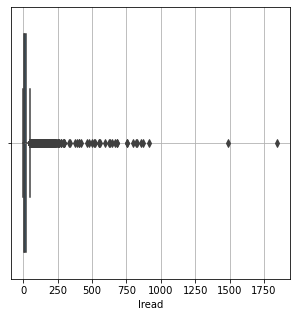

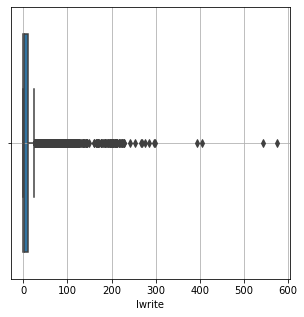

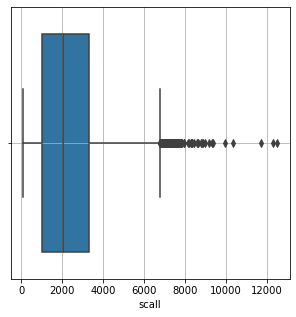

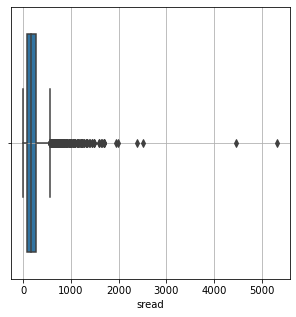

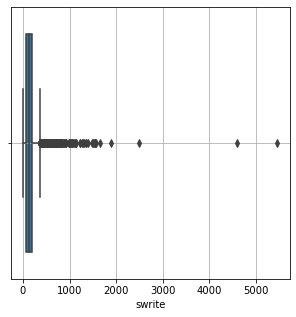

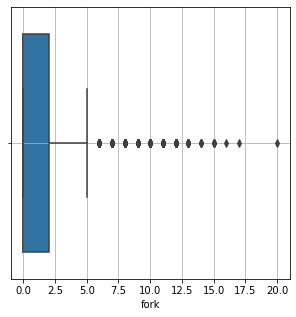

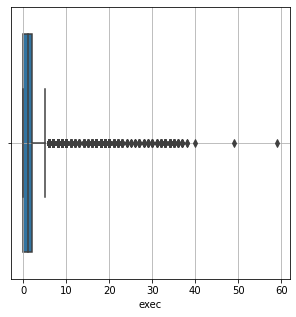

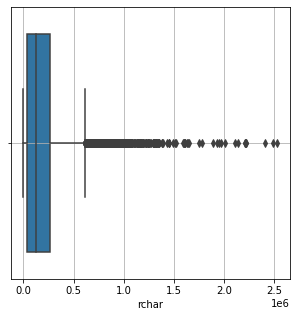

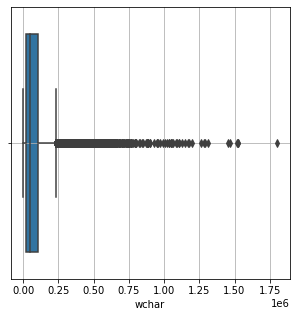

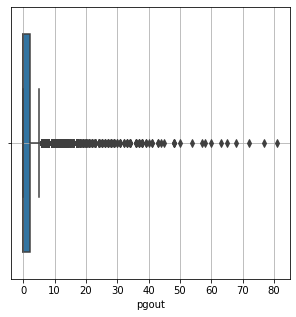

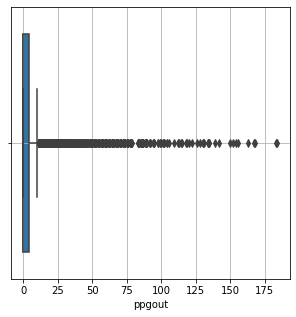

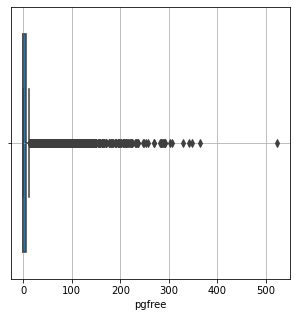

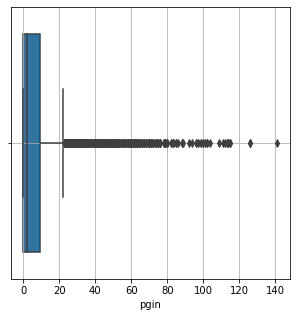

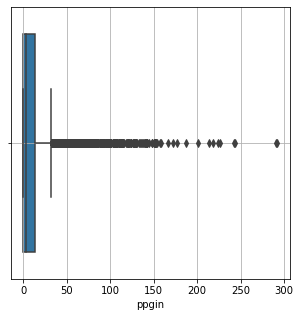

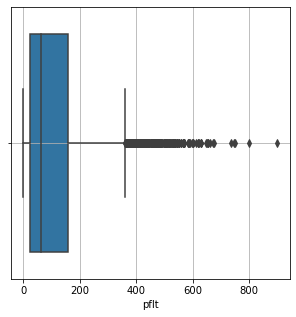

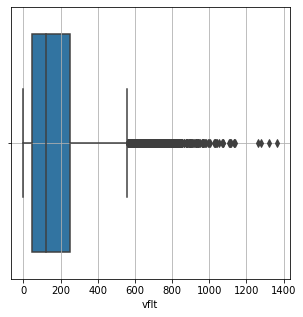

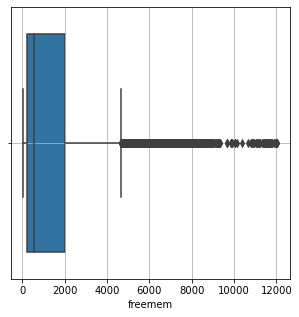

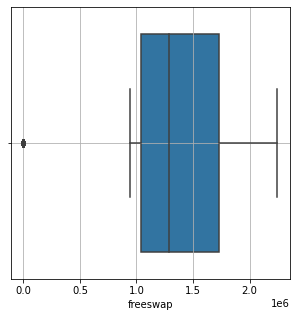

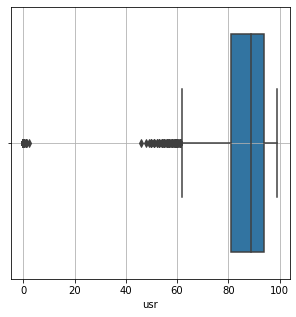

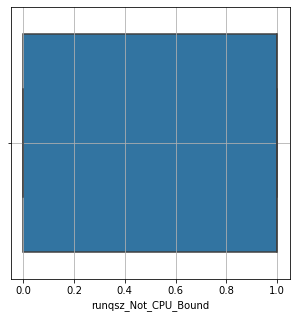

In [28]:
cols = ['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'usr', 'runqsz_Not_CPU_Bound']
for i in cols:
    sns.boxplot(data[i],whis=1.5)
    plt.grid()
    plt.show();


### Treating the outliers at 1.5 * IQR (Inter-Quartile Range).


In [29]:
# # Defining a function for getting the Upper and Lower limt acceptance of the outliers at 1.5*IQR. 
# # We can choose to treat the outliers at 3*IQR as well

def remove_outlier(col):
     sorted(col)
     Q1,Q3=np.percentile(col,[25,75])
     IQR=Q3-Q1
     lower_range= Q1-(1.5 * IQR)
     upper_range= Q3+(1.5 * IQR)
     return lower_range, upper_range


In [30]:
## This is a loop to treat outliers for all variable.

for column in data.columns:
     if data[column].dtype != 'object': 
         lr,ur=remove_outlier(data[column])
         data[column]=np.where(data[column]>ur,ur,data[column])
         data[column]=np.where(data[column]<lr,lr,data[column])


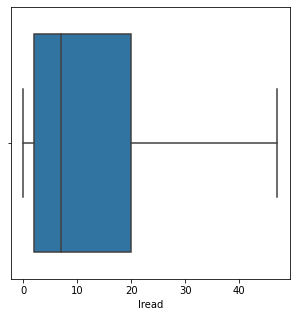

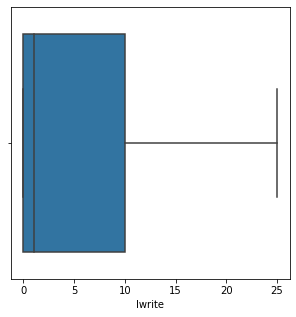

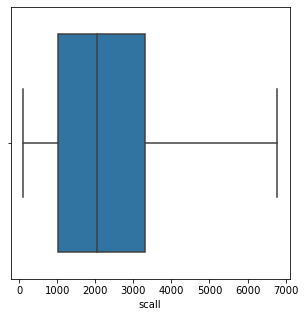

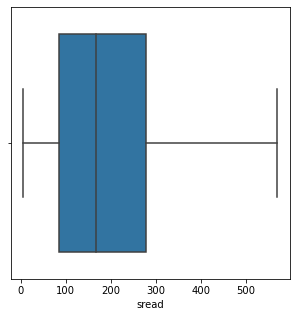

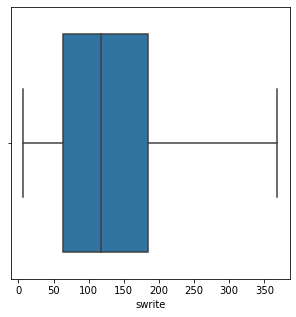

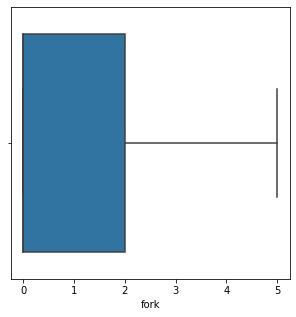

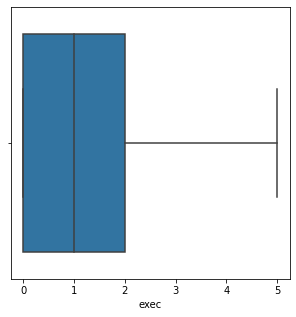

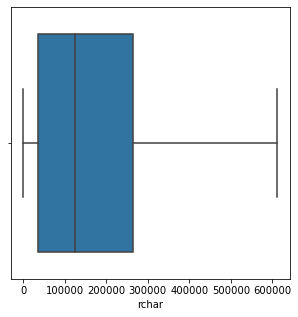

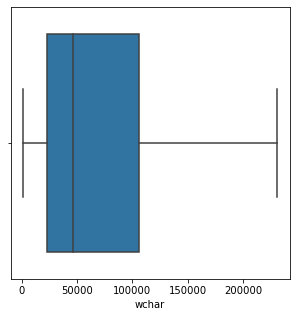

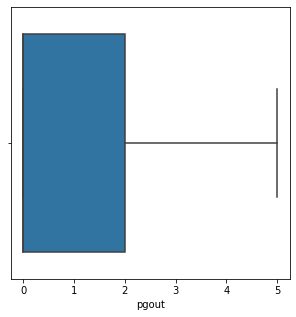

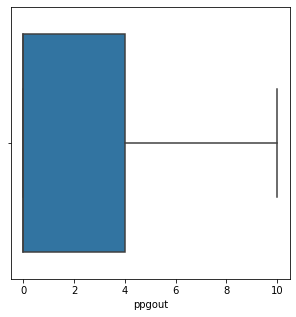

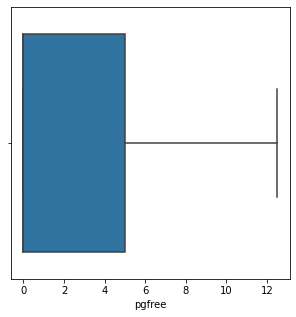

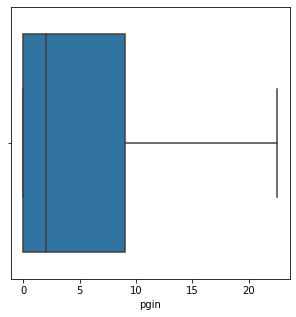

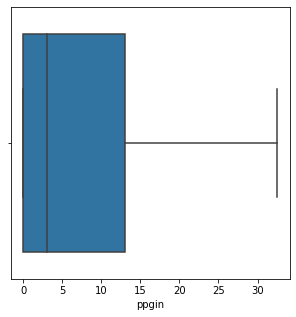

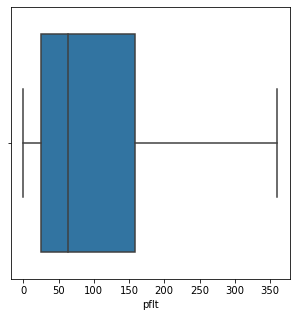

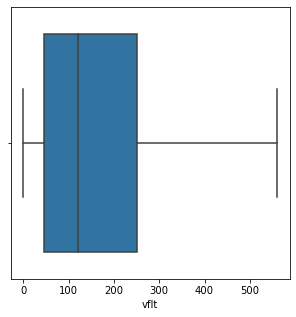

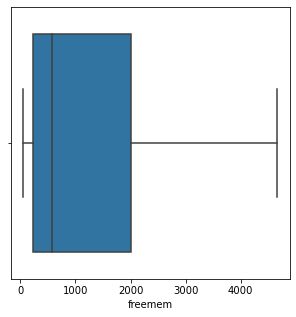

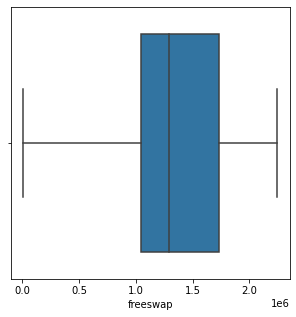

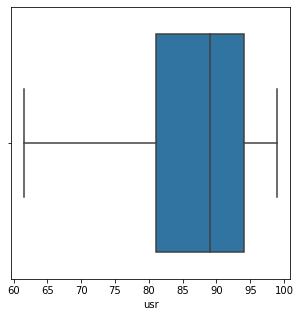

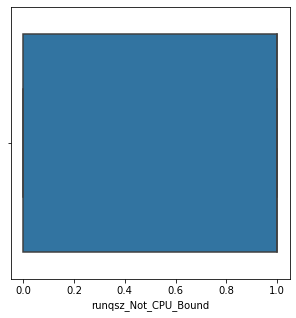

In [31]:
for i in data.columns:
    sns.boxplot(data[i])
    plt.show()


In [32]:
# To find correlation

corr = data.corr()
corr

lread    lwrite     scall     sread    swrite  \
lread                 1.000000  0.834674  0.333572  0.326032  0.306542   
lwrite                0.834674  1.000000  0.140213  0.148028  0.132097   
scall                 0.333572  0.140213  1.000000  0.763001  0.742206   
sread                 0.326032  0.148028  0.763001  1.000000  0.876652   
swrite                0.306542  0.132097  0.742206  0.876652  1.000000   
fork                  0.353823  0.084328  0.457265  0.513529  0.505485   
exec                  0.351479  0.117887  0.431473  0.375987  0.321673   
rchar                 0.255544  0.117504  0.386875  0.576127  0.419759   
wchar                 0.174410  0.132595  0.331933  0.415059  0.430126   
pgout                 0.208443  0.091375  0.293237  0.297755  0.271245   
ppgout                0.219558  0.088955  0.301797  0.313338  0.282129   
pgfree                0.214596  0.082682  0.296919  0.309683  0.277214   
pgin                  0.281853  0.112986  0.332226  0.344436  0.305079   
ppgin                 0.289461  0.118243  0.323816  0.343011  0.301087   
pflt                  0.375222  0.102699  0.485363  0.529312  0.505527   
vflt                  0.421086  0.135314  0.548157  0.597957  0.563258   
freemem              -0.201369 -0.099558 -0.388969 -0.349887 -0.350318   
freeswap             -0.243903 -0.149630 -0.357864 -0.369897 -0.336869   
usr                  -0.438163 -0.185695 -0.618932 -0.638072 -0.598098   
runqsz_Not_CPU_Bound -0.136419 -0.053363 -0.247893 -0.228820 -0.216083   

                          fork      exec     rchar     wchar     pgout  \
lread                 0.353823  0.351479  0.255544  0.174410  0.208443   
lwrite                0.084328  0.117887  0.117504  0.132595  0.091375   
scall                 0.457265  0.431473  0.386875  0.331933  0.293237   
sread                 0.513529  0.375987  0.576127  0.415059  0.297755   
swrite                0.505485  0.321673  0.419759  0.430126  0.271245   
fork                  1.000000  0.755095  0.356125  0.109581  0.190726   
exec                  0.755095  1.000000  0.331132  0.129697  0.223668   
rchar                 0.356125  0.331132  1.000000  0.486317  0.248883   
wchar                 0.109581  0.129697  0.486317  1.000000  0.195570   
pgout                 0.190726  0.223668  0.248883  0.195570  1.000000   
ppgout                0.207515  0.241301  0.268686  0.205559  0.942805   
pgfree                0.209350  0.243223  0.263282  0.188877  0.896802   
pgin                  0.232682  0.288936  0.367895  0.248553  0.430916   
ppgin                 0.221240  0.280028  0.389091  0.259465  0.442206   
pflt                  0.929892  0.754772  0.381597  0.125925  0.205130   
vflt                  0.921779  0.758254  0.438973  0.158084  0.296494   
freemem              -0.121079 -0.179525 -0.165552 -0.146838 -0.453374   
freeswap             -0.118567 -0.173838 -0.230327 -0.175309 -0.338576   
usr                  -0.665122 -0.594552 -0.507561 -0.317330 -0.377410   
runqsz_Not_CPU_Bound -0.110373 -0.123191 -0.239717 -0.254992 -0.020645   

                        ppgout    pgfree      pgin     ppgin      pflt  \
lread                 0.219558  0.214596  0.281853  0.289461  0.375222   
lwrite                0.088955  0.082682  0.112986  0.118243  0.102699   
scall                 0.301797  0.296919  0.332226  0.323816  0.485363   
sread                 0.313338  0.309683  0.344436  0.343011  0.529312   
swrite                0.282129  0.277214  0.305079  0.301087  0.505527   
fork                  0.207515  0.209350  0.232682  0.221240  0.929892   
exec                  0.241301  0.243223  0.288936  0.280028  0.754772   
rchar                 0.268686  0.263282  0.367895  0.389091  0.381597   
wchar                 0.205559  0.188877  0.248553  0.259465  0.125925   
pgout                 0.942805  0.896802  0.430916  0.442206  0.205130   
ppgout                1.000000  0.966526  0.462369  0.481104  0.221211   
pgfree                0.966

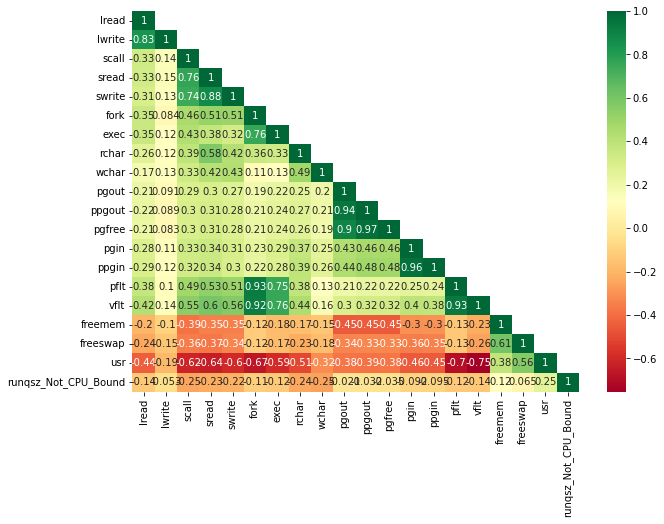

In [33]:
# Plot heatmap

plt.figure(figsize=(10,7))
sns.heatmap(corr,annot=True,mask=np.triu(corr,+1),cmap='RdYlGn');


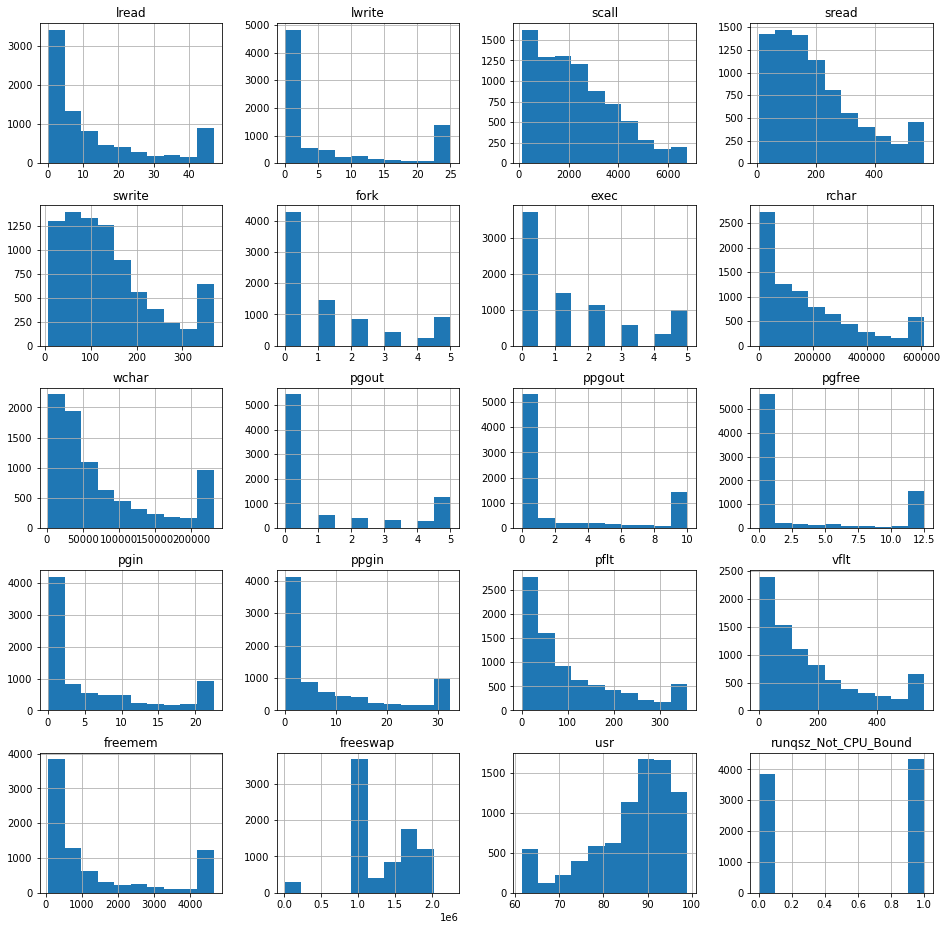

In [34]:
# To plot histogram

data.iloc[:,0:21].hist(figsize=(16,16))
plt.show()


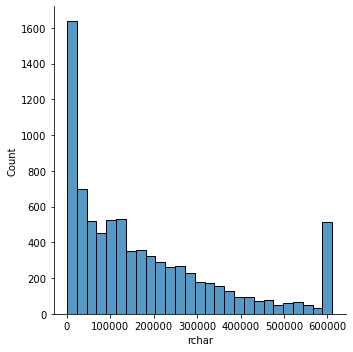

In [35]:
# To Plot displot for 'rchar'

sns.displot(data['rchar']);


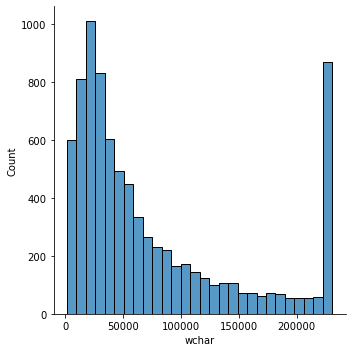

In [36]:
# To Plot displot for 'rchar'

sns.displot(data['wchar']);

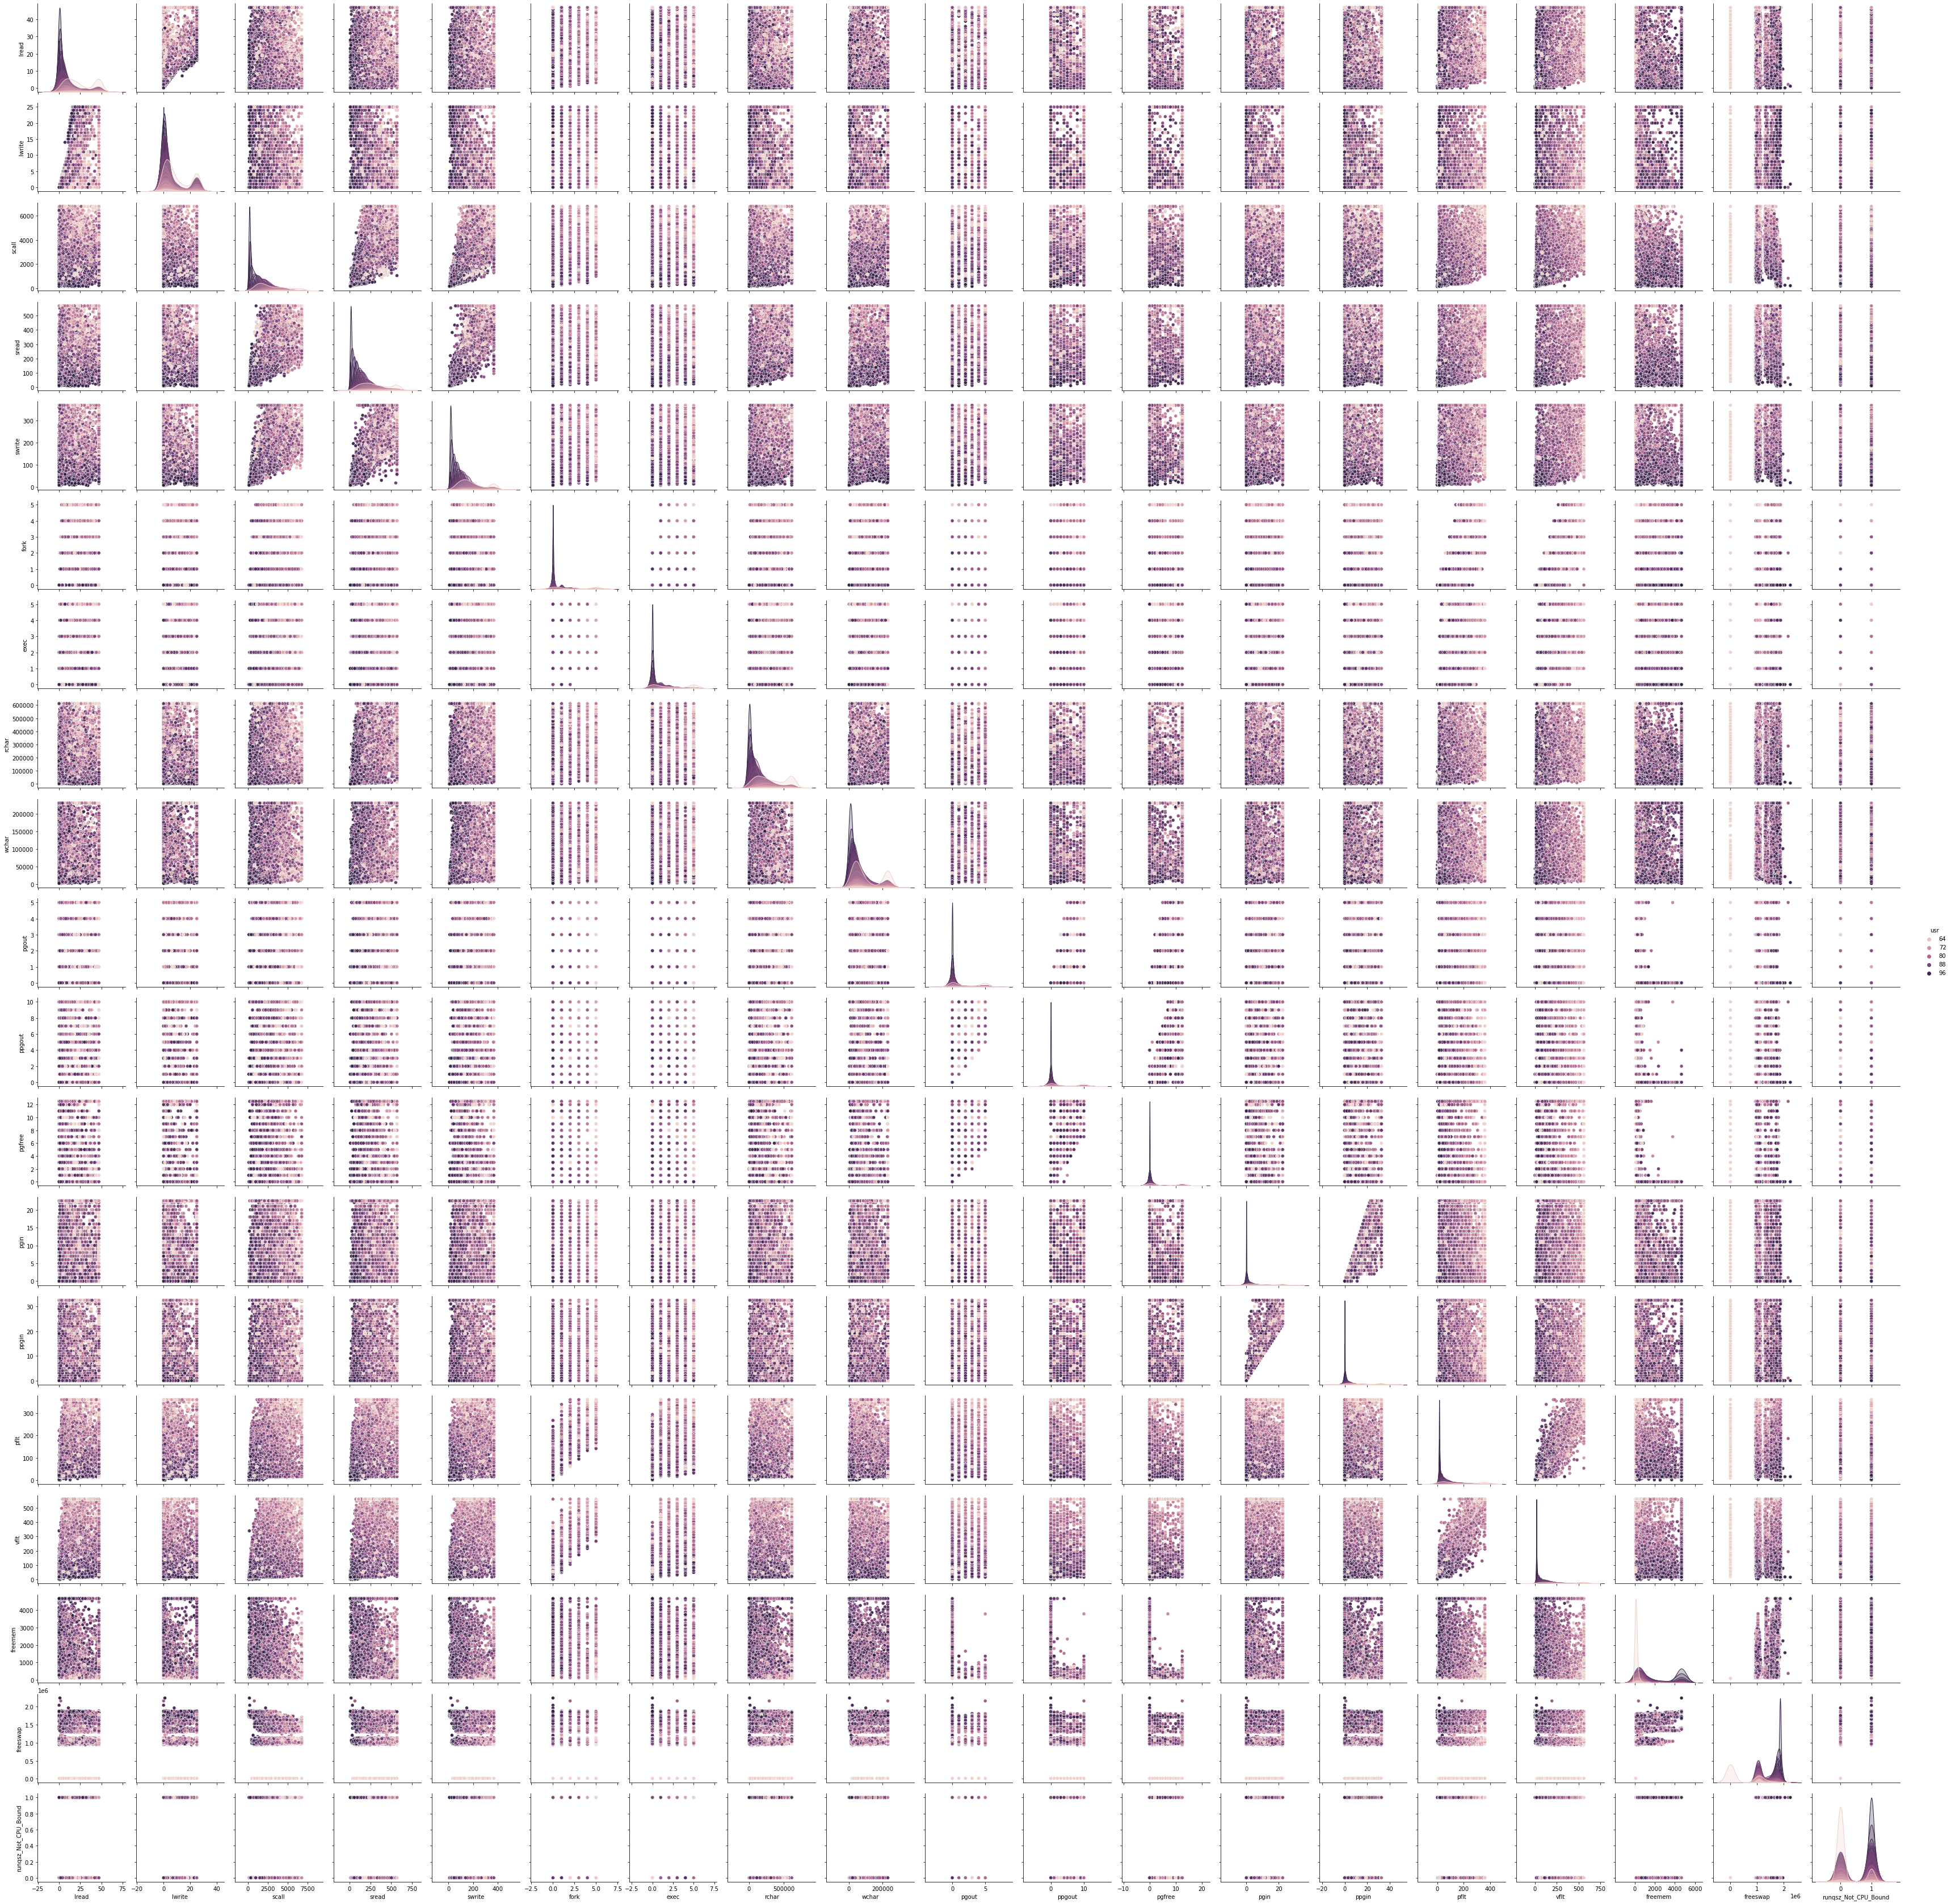

In [37]:
# Pairplot using sns

sns.pairplot(data, diag_kind='kde', hue='usr');


#### 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.


#### 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.


In [38]:
data.head()

lread  lwrite   scall  sread  swrite  fork  exec     rchar    wchar  pgout  \
0    1.0     0.0  2147.0   79.0    68.0   0.0   0.0   40671.0  53995.0    0.0   
1    0.0     0.0   170.0   18.0    21.0   0.0   0.0     448.0   8385.0    0.0   
2   15.0     3.0  2162.0  159.0   119.0   2.0   2.0  125473.0  31950.0    0.0   
3    0.0     0.0   160.0   12.0    16.0   0.0   0.0  125473.0   8670.0    0.0   
4    5.0     1.0   330.0   39.0    38.0   0.0   0.0  125473.0  12185.0    0.0   

   ppgout  pgfree  pgin  ppgin   pflt   vflt   freemem   freeswap   usr  \
0     0.0     0.0   1.0    2.0   16.0   26.0  4659.125  1730946.0  95.0   
1     0.0     0.0   0.0    0.0   15.0   16.0  4659.125  1869002.0  97.0   
2     0.0     0.0   6.0    9.0  150.0  220.0   702.000  1021237.0  87.0   
3     0.0     0.0   0.0    0.0   15.0   16.0  4659.125  1863704.0  98.0   
4     0.0     0.0   1.0    1.0   37.0   47.0   633.000  1760253.0  90.0   

   runqsz_Not_CPU_Bound  
0                   0.0  
1                   1.0  
2                   1.0  
3                   1.0  
4                   1.0

In [39]:
#check for Multicolinearity

def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=SM.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)


In [40]:
vif_cal(input_data=data[['lread','lwrite','scall','sread','swrite','fork','exec','rchar','wchar','pgout','ppgout','pgfree',
                         'pgin','ppgin','pflt','vflt','freemem','freeswap','runqsz_Not_CPU_Bound']])


lread  VIF =  5.21
lwrite  VIF =  4.26
scall  VIF =  2.94
sread  VIF =  6.5
swrite  VIF =  5.52
fork  VIF =  10.47
exec  VIF =  2.86
rchar  VIF =  2.07
wchar  VIF =  1.6
pgout  VIF =  9.48
ppgout  VIF =  27.89
pgfree  VIF =  15.96
pgin  VIF =  13.37
ppgin  VIF =  13.62
pflt  VIF =  11.17
vflt  VIF =  14.67
freemem  VIF =  1.92
freeswap  VIF =  1.82
runqsz_Not_CPU_Bound  VIF =  1.14


#### Multicollinearity exist as VIF>5

### Building a base model with all the features

In [41]:
import statsmodels.formula.api as SM


In [42]:
data.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgin', 'ppgin', 'pflt', 'vflt',
       'freemem', 'freeswap', 'usr', 'runqsz_Not_CPU_Bound'],
      dtype='object')

In [45]:
# Base Model

f_1 = 'usr ~ lread + lwrite + scall + sread + swrite + fork + exec + rchar + wchar + pgout + ppgout + pgfree + pgin + ppgin + pflt + vflt + freemem + freeswap + runqsz_Not_CPU_Bound'

In [46]:
model_1 = SM.ols(f_1, data = data).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     1597.
Date:                Sat, 11 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:24:14   Log-Likelihood:                -23928.
No. Observations:                8192   AIC:                         4.790e+04
Df Residuals:                    8172   BIC:                         4.804e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               82.8082      0.267    310.179      0.000      82.285      83.332
lread                   -0.0577      0.007     -7.709      0.000      -0.072      -0.043
lwrite                   0.0479      0.011      4.340      0.000       0.026       0.070
scall                   -0.0008   5.35e-05    -14.069      0.000      -0.001      -0.001
sread                    0.0013      0.001      1.513      0.130      -0.000       0.003
swrite                  -0.0034      0.001     -2.854      0.004      -0.006      -0.001
fork                    -0.6205      0.095     -6.545      0.000      -0.806      -0.435
exec                    -0.1124      0.049     -2.310      0.021      -0.208      -0.017
rchar                 -4.92e-06   4.09e-07    -12.020      0.000   -5.72e-06   -4.12e-06
wchar                -6.018e-06   8.83e-07     -6.817      0.000   -7.75e-06   -4.29e-06
pgout                   -0.3593      0.081     -4.441      0.000      -0.518      -0.201
ppgout                  -0.0574      0.068     -0.844      0.399      -0.191       0.076
pgfree                   0.0794      0.040      1.991      0.047       0.001       0.158
pgin                     0.0096      0.024      0.397      0.691      -0.038       0.057
ppgin                   -0.0684      0.017     -4.087      0.000      -0.101      -0.036
pflt                    -0.0306      0.002    -18.678      0.000      -0.034      -0.027
vflt                    -0.0030      0.001     -2.540      0.011      -0.005      -0.001
freemem                 -0.0005   4.28e-05    -11.232      0.000      -0.001      -0.000
freeswap              9.332e-06   1.59e-07     58.549      0.000    9.02e-06    9.64e-06
runqsz_Not_CPU_Bound     1.8008      0.106     16.917      0.000       1.592       2.009
==============================================================================
Omnibus:                     1432.187   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2825.669
Skew:                          -1.063   Prob(JB):                         0.00
Kurtosis:                       4.939   Cond. No.                     7.66e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.66e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
vif_cal(input_data=data[['lread','lwrite','scall','sread','swrite','fork','exec','rchar','wchar','pgout','ppgout','pgfree',
                         'pgin','ppgin','pflt','vflt','freemem','freeswap','runqsz_Not_CPU_Bound']])


lread  VIF =  5.21
lwrite  VIF =  4.26
scall  VIF =  2.94
sread  VIF =  6.5
swrite  VIF =  5.52
fork  VIF =  10.47
exec  VIF =  2.86
rchar  VIF =  2.07
wchar  VIF =  1.6
pgout  VIF =  9.48
ppgout  VIF =  27.89
pgfree  VIF =  15.96
pgin  VIF =  13.37
ppgin  VIF =  13.62
pflt  VIF =  11.17
vflt  VIF =  14.67
freemem  VIF =  1.92
freeswap  VIF =  1.82
runqsz_Not_CPU_Bound  VIF =  1.14


### Building 2nd iteration removing 'ppgout' as p-value>0.05

In [48]:
#2nd Iteration

f_2 = 'usr ~ lread + lwrite + scall + sread + swrite + fork + exec + rchar + wchar + pgout +  pgfree + pgin + ppgin + pflt + vflt + freemem + freeswap + runqsz_Not_CPU_Bound'

In [49]:
model_2 = SM.ols(f_2,data=data).fit()
model_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     1685.
Date:                Sat, 11 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:25:33   Log-Likelihood:                -23929.
No. Observations:                8192   AIC:                         4.790e+04
Df Residuals:                    8173   BIC:                         4.803e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               82.8224      0.266    310.855      0.000      82.300      83.345
lread                   -0.0579      0.007     -7.734      0.000      -0.073      -0.043
lwrite                   0.0481      0.011      4.359      0.000       0.026       0.070
scall                   -0.0008   5.35e-05    -14.069      0.000      -0.001      -0.001
sread                    0.0013      0.001      1.506      0.132      -0.000       0.003
swrite                  -0.0034      0.001     -2.851      0.004      -0.006      -0.001
fork                    -0.6198      0.095     -6.538      0.000      -0.806      -0.434
exec                    -0.1125      0.049     -2.313      0.021      -0.208      -0.017
rchar                 -4.92e-06   4.09e-07    -12.021      0.000   -5.72e-06   -4.12e-06
wchar                -6.054e-06   8.82e-07     -6.867      0.000   -7.78e-06   -4.33e-06
pgout                   -0.4050      0.060     -6.731      0.000      -0.523      -0.287
pgfree                   0.0522      0.023      2.228      0.026       0.006       0.098
pgin                     0.0103      0.024      0.424      0.672      -0.037       0.058
ppgin                   -0.0690      0.017     -4.127      0.000      -0.102      -0.036
pflt                    -0.0306      0.002    -18.673      0.000      -0.034      -0.027
vflt                    -0.0030      0.001     -2.552      0.011      -0.005      -0.001
freemem                 -0.0005   4.28e-05    -11.261      0.000      -0.001      -0.000
freeswap              9.328e-06   1.59e-07     58.550      0.000    9.02e-06    9.64e-06
runqsz_Not_CPU_Bound     1.8001      0.106     16.910      0.000       1.591       2.009
==============================================================================
Omnibus:                     1430.619   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2821.310
Skew:                          -1.062   Prob(JB):                         0.00
Kurtosis:                       4.938   Cond. No.                     7.65e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.65e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
vif_cal(input_data=data[['lread','lwrite','scall','sread','swrite','fork','exec','rchar','wchar','pgout','pgfree',
                         'pgin','ppgin','pflt','vflt','freemem','freeswap','runqsz_Not_CPU_Bound']])


lread  VIF =  5.21
lwrite  VIF =  4.26
scall  VIF =  2.94
sread  VIF =  6.5
swrite  VIF =  5.52
fork  VIF =  10.47
exec  VIF =  2.86
rchar  VIF =  2.07
wchar  VIF =  1.6
pgout  VIF =  5.24
pgfree  VIF =  5.5
pgin  VIF =  13.35
ppgin  VIF =  13.6
pflt  VIF =  11.17
vflt  VIF =  14.67
freemem  VIF =  1.91
freeswap  VIF =  1.82
runqsz_Not_CPU_Bound  VIF =  1.14


### Building 3rd Iteration removing "pgin" as p-value > 0.05

In [51]:
#3rd Iteration

f_3 = 'usr ~ lread + lwrite + scall + sread + swrite + fork + exec + rchar + wchar + pgout +  pgfree + ppgin + pflt + vflt + freemem + freeswap + runqsz_Not_CPU_Bound'

In [52]:
model_3 = SM.ols(f_3,data=data).fit()
model_3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     1785.
Date:                Sat, 11 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:26:43   Log-Likelihood:                -23929.
No. Observations:                8192   AIC:                         4.789e+04
Df Residuals:                    8174   BIC:                         4.802e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               82.8300      0.266    311.606      0.000      82.309      83.351
lread                   -0.0579      0.007     -7.748      0.000      -0.073      -0.043
lwrite                   0.0481      0.011      4.363      0.000       0.026       0.070
scall                   -0.0008   5.35e-05    -14.064      0.000      -0.001      -0.001
sread                    0.0013      0.001      1.507      0.132      -0.000       0.003
swrite                  -0.0034      0.001     -2.855      0.004      -0.006      -0.001
fork                    -0.6206      0.095     -6.547      0.000      -0.806      -0.435
exec                    -0.1122      0.049     -2.306      0.021      -0.208      -0.017
rchar                -4.931e-06   4.08e-07    -12.071      0.000   -5.73e-06   -4.13e-06
wchar                -6.048e-06   8.82e-07     -6.861      0.000   -7.78e-06   -4.32e-06
pgout                   -0.4038      0.060     -6.720      0.000      -0.522      -0.286
pgfree                   0.0516      0.023      2.207      0.027       0.006       0.097
ppgin                   -0.0624      0.006    -10.412      0.000      -0.074      -0.051
pflt                    -0.0306      0.002    -18.749      0.000      -0.034      -0.027
vflt                    -0.0029      0.001     -2.521      0.012      -0.005      -0.001
freemem                 -0.0005   4.28e-05    -11.264      0.000      -0.001      -0.000
freeswap              9.324e-06   1.59e-07     58.640      0.000    9.01e-06    9.64e-06
runqsz_Not_CPU_Bound     1.8001      0.106     16.911      0.000       1.591       2.009
==============================================================================
Omnibus:                     1431.786   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2825.301
Skew:                          -1.062   Prob(JB):                         0.00
Kurtosis:                       4.940   Cond. No.                     7.63e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.63e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
vif_cal(input_data=data[['lread','lwrite','scall','sread','swrite','fork','exec','rchar','wchar','pgout','pgfree',
                         'ppgin','pflt','vflt','freemem','freeswap','runqsz_Not_CPU_Bound']])


lread  VIF =  5.21
lwrite  VIF =  4.26
scall  VIF =  2.94
sread  VIF =  6.5
swrite  VIF =  5.52
fork  VIF =  10.47
exec  VIF =  2.86
rchar  VIF =  2.06
wchar  VIF =  1.6
pgout  VIF =  5.23
pgfree  VIF =  5.48
ppgin  VIF =  1.75
pflt  VIF =  11.11
vflt  VIF =  14.5
freemem  VIF =  1.91
freeswap  VIF =  1.81
runqsz_Not_CPU_Bound  VIF =  1.14


### Building 4th Iteration removing "sread" as p-value > 0.05

In [54]:
# 4th Iteration

f_4 = 'usr ~ lread + lwrite + scall + swrite + fork + exec + rchar + wchar + pgout +  pgfree + ppgin + pflt + vflt + freemem + freeswap + runqsz_Not_CPU_Bound'

In [55]:
model_4 = SM.ols(f_4,data=data).fit()
model_4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     1896.
Date:                Sat, 11 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:27:25   Log-Likelihood:                -23930.
No. Observations:                8192   AIC:                         4.789e+04
Df Residuals:                    8175   BIC:                         4.801e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               82.8414      0.266    311.752      0.000      82.320      83.362
lread                   -0.0585      0.007     -7.830      0.000      -0.073      -0.044
lwrite                   0.0490      0.011      4.445      0.000       0.027       0.071
scall                   -0.0007    5.1e-05    -14.265      0.000      -0.001      -0.001
swrite                  -0.0022      0.001     -2.481      0.013      -0.004      -0.000
fork                    -0.6255      0.095     -6.603      0.000      -0.811      -0.440
exec                    -0.1152      0.049     -2.370      0.018      -0.210      -0.020
rchar                -4.667e-06   3.69e-07    -12.644      0.000   -5.39e-06   -3.94e-06
wchar                -6.156e-06   8.79e-07     -7.006      0.000   -7.88e-06   -4.43e-06
pgout                   -0.4054      0.060     -6.745      0.000      -0.523      -0.288
pgfree                   0.0526      0.023      2.250      0.024       0.007       0.098
ppgin                   -0.0628      0.006    -10.493      0.000      -0.075      -0.051
pflt                    -0.0306      0.002    -18.737      0.000      -0.034      -0.027
vflt                    -0.0028      0.001     -2.419      0.016      -0.005      -0.001
freemem                 -0.0005   4.28e-05    -11.240      0.000      -0.001      -0.000
freeswap              9.306e-06   1.59e-07     58.685      0.000       9e-06    9.62e-06
runqsz_Not_CPU_Bound     1.8018      0.106     16.927      0.000       1.593       2.010
==============================================================================
Omnibus:                     1436.538   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2839.013
Skew:                          -1.065   Prob(JB):                         0.00
Kurtosis:                       4.944   Cond. No.                     7.63e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.63e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
vif_cal(input_data=data[['lread','lwrite','scall','swrite','fork','exec','rchar','wchar','pgout','pgfree',
                         'ppgin','pflt','vflt','freemem','freeswap','runqsz_Not_CPU_Bound']])


lread  VIF =  5.2
lwrite  VIF =  4.24
scall  VIF =  2.68
swrite  VIF =  3.08
fork  VIF =  10.45
exec  VIF =  2.86
rchar  VIF =  1.68
wchar  VIF =  1.59
pgout  VIF =  5.23
pgfree  VIF =  5.48
ppgin  VIF =  1.74
pflt  VIF =  11.11
vflt  VIF =  14.42
freemem  VIF =  1.91
freeswap  VIF =  1.8
runqsz_Not_CPU_Bound  VIF =  1.14


In [57]:
#Using the last best model 
model_4_pred = model_4.fittedvalues


In [58]:
data['usr'],model_4_pred

(0       95.0
 1       97.0
 2       87.0
 3       98.0
 4       90.0
         ... 
 8187    80.0
 8188    90.0
 8189    87.0
 8190    83.0
 8191    94.0
 Name: usr, Length: 8192, dtype: float64,
 0       93.725775
 1       99.067187
 2       83.203991
 3       98.451038
 4       98.164188
           ...    
 8187    76.715222
 8188    84.994735
 8189    83.749490
 8190    81.589547
 8191    92.722514
 Length: 8192, dtype: float64)

<AxesSubplot:ylabel='Density'>

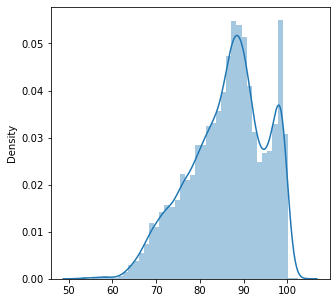

In [59]:
# plot distplot

sns.distplot(model_4.fittedvalues)
#sns.distplot(data['usr']);


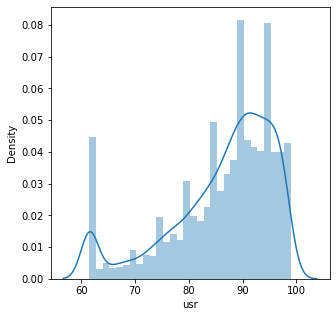

In [60]:
sns.distplot(data['usr']);


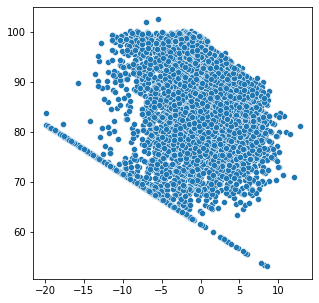

In [61]:
#Linear Relationship b/w Dependent and Independent Varaibles 

sns.scatterplot(model_4.resid,model_4.fittedvalues)
plt.show()


### CONCLUSIONS FROM 7th Iteration that is BEST MODEL

#### The R-squared and adjusted R-squared values of 1.000 indicate that the linear regression model fits the data perfectly. R-squared is a measure of the proportion of variation in the dependent variable that is explained by the independent variables in the model. An R-squared value of 1.000 means that 100% of the variation in the dependent variable is explained by the independent variables.

#### In this case, the "Model: OLS" means that the linear regression model used is an ordinary least squares (OLS) regression, which is the most commonly used method for linear regression.

#### It is important to note that a perfect R-squared value is not always a good thing, as it may indicate overfitting, where the model fits the data too closely and may not be able to generalize well to new data.

#### usr= - (lread x 0.0585) + (lwrite x 0.0490) - (scall x 0.0007)  - (swrite x 0.0022	) - (fork x 0.6255) - (exec x 0.1152) - (rchar x 4.667e-06) - (wchar x 6.156e-06) - (pgout x 0.4054) + (pgfree x 0.0526) - (pgscan x 1.215e-13) + (atch x 4.751e-14) - (ppgin x 0.0628) -  (pflt x 0.0306) - (vflt x 0.0028) - (freemem x 0.0005) + (freeswap x 9.306e-06) + (pfrunqsz_Not_CPU_Boundlt x 1.8018) 


### To find out how each attribute affects the system to be in 'usr' mode using a list of system attributes.
#### This means:

#### Addition of lread attribute does not affects the system to be in 'usr' mode using a list of system attributes

#### Addition of lwrite attribute affects the system to be in 'usr' mode using a list of system attributes

#### Addition of scall attribute does not affects the system to be in 'usr' mode using a list of system attributes

#### Addition of swrite does not attribute affects the system to be in 'usr' mode using a list of system attributes

#### Addition of fork does not attribute affects the system to be in 'usr' mode using a list of system attributes

#### Addition of exec does not attribute affects the system to be in 'usr' mode using a list of system attributes

#### Addition the rchar does not attribute affects the system to be in 'usr' mode using a list of system attributes

#### Addition the wchar does not attribute affects the system to be in 'usr' mode using a list of system attributes

#### Addition of pgout does not attribute affects the system to be in 'usr' mode using a list of system attributes

#### Addition of pgfree attribute affects the system to be in 'usr' mode using a list of system attributes

#### Addition of ppgin does not attribute affects the system to be in 'usr' mode using a list of system attributes

#### Addition the pflt does not attribute affects the system to be in 'usr' mode using a list of system attributes

#### Addition of vflt does not attribute affects the system to be in 'usr' mode using a list of system attributes

#### Addition of does not freemem attribute affects the system to be in 'usr' mode using a list of system attributes

#### Addition of freeswap attribute affects the system to be in 'usr' mode using a list of system attributes

#### Addition of pfrunqsz_Not_CPU_Boundltattribute affects the system to be in 'usr' mode using a list of system attributes


## 9.Best Model vs Base Model¶


In [62]:
from sklearn.linear_model import LinearRegression


In [63]:
lr = LinearRegression()


In [64]:
from sklearn.model_selection import train_test_split


In [65]:
X = data[['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']]
Y = data['usr']


In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)


### 9.1 Base Model building using sklearn Linear Regression¶


In [67]:
model_base = lr.fit(X_train[['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']],Y_train)


In [68]:
#Training Data Prediction

model_base_train = model_base.predict(X_train[['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']])


In [69]:
#Test Data Prediction

model_base_test = model_base.predict(X_test[['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']])


In [70]:
from sklearn.metrics import mean_squared_error


In [71]:
RMSE_Train_base = np.round(np.sqrt(mean_squared_error(Y_train,model_base_train)),2)
RMSE_Test_base = np.round(np.sqrt(mean_squared_error(Y_test,model_base_test)),2)


print('Training Data RMSE of model_base:',RMSE_Train_base )
print('Test Data RMSE of model_base:',RMSE_Test_base)


Training Data RMSE of model_base: 4.43
Test Data RMSE of model_base: 4.65


In [72]:
resultDf_trn = pd.DataFrame({'RMSE Training Data':[RMSE_Train_base],'RMSE Test Data':[RMSE_Test_base]},index=['Base Model'])
resultDf_trn


RMSE Training Data  RMSE Test Data
Base Model                4.43            4.65

### 9.2 Best Model building using sklearn Linear Regression¶


In [73]:
model_best = lr.fit(X_train[['lread','lwrite','scall','swrite','fork','exec','rchar','wchar','pgout','pgfree',
                         'ppgin','pflt','vflt','freemem','freeswap','runqsz_Not_CPU_Bound']],Y_train)


In [74]:
#Training Data Prediction

model_best_train = model_best.predict(X_train[['lread','lwrite','scall','swrite','fork','exec','rchar','wchar','pgout','pgfree',
                         'ppgin','pflt','vflt','freemem','freeswap','runqsz_Not_CPU_Bound']])


In [75]:
#Test Data Prediction

model_best_test = model_best.predict(X_test[['lread','lwrite','scall','swrite','fork','exec','rchar','wchar','pgout','pgfree',
                         'ppgin','pflt','vflt','freemem','freeswap','runqsz_Not_CPU_Bound']])


In [76]:
from sklearn.metrics import mean_squared_error


In [77]:
RMSE_Train_best = np.round(np.sqrt(mean_squared_error(Y_train,model_best_train)),2)
RMSE_Test_best = np.round(np.sqrt(mean_squared_error(Y_test,model_best_test)),2)


print('Training Data RMSE of model_base:',RMSE_Train_best)
print('Test Data RMSE of model_base:',RMSE_Test_best)


Training Data RMSE of model_base: 4.43
Test Data RMSE of model_base: 4.65


In [78]:
resultDf_tst = pd.DataFrame({'RMSE Training Data':[RMSE_Train_best],'RMSE Test Data':[RMSE_Test_best]},index=['Best Model'])
resultDf_tst


RMSE Training Data  RMSE Test Data
Best Model                4.43            4.65

In [79]:
resultDf = pd.concat([resultDf_trn, resultDf_tst])
resultDf


RMSE Training Data  RMSE Test Data
Base Model                4.43            4.65
Best Model                4.43            4.65

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(data[['lread','lwrite','scall','sread','swrite','fork','exec','rchar','wchar','pgout','ppgout','pgfree',
     'pgin','ppgin','pflt','vflt','runqsz_Not_CPU_Bound','freemem','freeswap']],
                                                    data['usr'],test_size=0.3,random_state = 1 )

In [82]:
linreg = LinearRegression()
linreg.fit( X_train, y_train )#fit model on train data

LinearRegression()

In [83]:
linreg.intercept_ #intercept of the model

83.67102302034316

In [84]:
#co-efficient of each DV- in the order given i.e."TV", "radio", "newspaper"
linreg.coef_

array([-6.38816494e-02,  4.76773829e-02, -7.31180414e-04,  1.25975719e-04,
       -3.47779843e-03, -5.56545961e-01, -1.50837750e-01, -5.03473185e-06,
       -5.81607978e-06, -2.54156682e-01, -1.29724545e-01,  9.31534773e-02,
        1.15892236e-02, -7.07714709e-02, -3.15668708e-02, -2.49456239e-03,
        1.64813650e+00, -4.60440333e-04,  8.92196594e-06])

In [85]:
pred=linreg.predict(X_train)
print (pred[:5])

[90.80782136 91.6825209  74.3763833  80.61896709 98.48344593]


In [86]:
#predicting on the test data

pred_test=linreg.predict(X_test)
actual_test=np.array(y_test)

SSE=sum((actual_test-pred_test)**2)
print("SSE is {}".format(np.round(SSE),2))

SSE is 53153.0


In [87]:
#RMSE

RMSE_test= (SSE/len(X_test))**0.5
print (("RMSE_test is {}".format(RMSE_test)))
MAPE_test= np.mean(abs((actual_test-pred_test)/actual_test))
print ("MAPE_test is {}".format(MAPE_test))

RMSE_test is 4.650220229436842
MAPE_test is 0.04215950483348954


In [88]:
# calculating the R-squared value for a linear regression model fit on the training data. 
# R-squared is a measure of how well the regression model fits the data, with a value of 1 indicating a perfect fit 
# and a value close to 0 indicating a poor fit.

TSS_train= sum((y_train-np.mean(y_train))**2)
pred_train=linreg.predict(X_train)
actual_train=np.array(y_train)
SSE_train=sum((actual_train-pred_train)**2)

R2_train=1-SSE_train/TSS_train
print(R2_train)

0.795269169097957


In [89]:
TSS= sum((y_test-np.mean(y_train))**2)

R2=1-SSE/TSS
print(R2)

0.7680539829788121


In [90]:
temp=pd.DataFrame({"actual":actual_test,
                   "predicted":pred_test})

temp.head()

actual  predicted
0    95.0  96.954838
1    95.0  90.397463
2    61.5  77.696717
3    80.0  76.868915
4    79.0  77.694744

In [91]:
y_train

694     91.0
5535    94.0
4244    61.5
2472    83.0
7052    94.0
        ... 
7935    80.0
5192    94.0
3980    86.0
235     82.0
5157    94.0
Name: usr, Length: 5734, dtype: float64

In [92]:
y_train

694     91.0
5535    94.0
4244    61.5
2472    83.0
7052    94.0
        ... 
7935    80.0
5192    94.0
3980    86.0
235     82.0
5157    94.0
Name: usr, Length: 5734, dtype: float64

In [93]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

lread  lwrite   scall  sread  swrite  fork  exec     rchar       wchar  \
694     1.0     1.0  1345.0  223.0   192.0   0.0   0.0  198703.0  230625.875   
5535    1.0     1.0  1429.0   87.0    67.0   0.0   0.0    7163.0   24842.000   
4244   47.0    25.0  3273.0  225.0   180.0   0.0   0.0   83246.0   53705.000   
2472   13.0     8.0  4349.0  300.0   191.0   2.0   3.0   96009.0   70467.000   
7052   17.0    23.0   225.0   13.0    13.0   0.0   1.0   17132.0   12514.000   

      pgout  ppgout  pgfree  pgin  ppgin   pflt   vflt  runqsz_Not_CPU_Bound  \
694     0.0     6.0    12.5   3.0    7.0   28.0   56.0                   0.0   
5535    0.0     0.0     0.0   1.0    1.0   15.0   30.0                   1.0   
4244    5.0     7.0     7.0   3.0    4.0   59.0   74.0                   0.0   
2472    0.0     0.0     0.0   2.0    3.0  129.0  236.0                   0.0   
7052    0.0     0.0     0.0   0.0    0.0   19.0   23.0                   1.0   

      freemem   freeswap   usr  
694     121.0  1375446.0  91.0  
5535   1476.0  1021541.0  94.0  
4244     82.0    10989.5  61.5  
2472    772.0   993909.0  83.0  
7052   4179.0  1821682.0  94.0

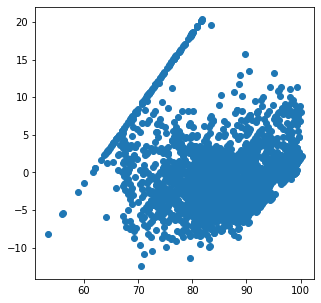

In [94]:
#Assumptions of Linear Regression
#Linear relation b/w Response and predictor variables


plt.scatter(temp['predicted'],temp['predicted']-temp['actual']);#to verify
#if you see a pattern in this plot, it means.

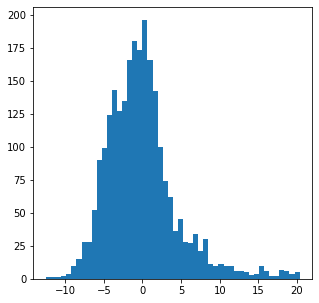

In [95]:
#Normality of Errors

plt.hist(temp['predicted']-temp['actual'],bins=50);

In [96]:
# No multi collinearity among predictor variablees
#use r to find out.
#np.corrcoef(A,B)

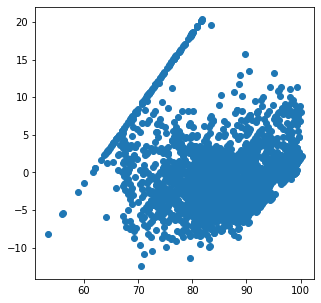

In [97]:
# no heteroskedasticity
plt.scatter(temp['predicted'],temp['predicted']-temp['actual']);

In [98]:
np.corrcoef(temp['predicted'],temp['actual'])

array([[1.       , 0.8764567],
       [0.8764567, 1.       ]])

In [99]:
mean_x=np.mean(temp['predicted'])
mean_y=np.mean(temp['actual'])
sd_x=np.std(temp['predicted'])
sd_y=np.std(temp['actual'])